### MLR Diagnostics Wrap-Up



**Exercise 1)** State the MLR assumptions that are necessary for using ordinary least squares.

 - constant variance of residuals (homoscedastic)
 - linearity
 - assume low/no collinearity/multicollinearity
 - independance in error/residuals
 - normality of the residuals. 

**Exercise 2)** How do you test for linear relationship, normality of residuals, no multicollinearity, and homoscedasticity?

constant variance: residuals vs fitted plot , levene test
fix: possibly rescaling of just response or of response and features


Normality of residuals: QQplot, Shapiro-Wilk test
- H0 : The residuals are normal
- H1 : The residuals are not normal

Linearity: residuals vs fitted plot or fitted vs observed plot or pairwise scatter plots

Collinearity/MultiCollinearity: pairwise scatter plots
summary: NA row or some of the coefficients are counterintuitive and pvalues that indicate counterintuitive significance. 
vif


independance: successive residual plot
autocorrelation of order 1
Durbin-Watson test

**Exercise 3)** Diagnosing multicollinearity.

In MLR, when multicollinearity exists between variables, this means that there is redundancy between predictor variables. When multicollinearity is present, the solution of the regression model becomes unstable. It also might not be possible to estimate the coefficients.

- We've discussed looking for NA values in the table of regression coefficients. 

- We can also assess multicollinearity by computing the variance inflation factor (VIF). This measures how much variance of a regression coefficient is inflated due to multicollinearity. Look for VIF > 5-10. That is the threshold for a problematic amount of collinearity.

- When you find multicollinearity, you should remove the features that are causing it.

In [1]:
library(tidyverse)
library(caret)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.0 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




Let's investigate multicollinearity using the folling data set. This data set is for predicting the median house value in Boston suburbs, based on multiple predictor variables.

**Part A:** First load the data.

In [2]:
data("Boston", package = "MASS")

**Part B:** Next split the data into a training set and a test set with an 80/20 split.

In [3]:
training.samples = Boston$medv %>%
    createDataPartition(p=0.8, list=FALSE)
train.data = Boston[training.samples,]
test.data = Boston[-training.samples,]

**Part C:** Build a regression model with all of the predictor variables. Analyze the model

In [9]:
# 1) CODE HERE
# Build the model
model_full = lm(medv~.,data= train.data)

# Make predictions using the test data
predictions = model_full %>% predict(test.data)

# Find the RMSE and R2 values to analyze performance
data.frame(RMSE = RMSE(predictions,test.data$medv), R2 = R2(predictions,test.data$medv))

RMSE,R2
<dbl>,<dbl>
4.083014,0.7207091


**Part D:** Use the `vif` score to detect multicollinearity in this regression model.

In [7]:
# 2) CODE HERE
source("vif_function.r")
vif(model_full)

crim       zn    indus     chas      nox       rm      age      dis 
1.718683 2.217404 4.304450 1.079550 4.585474 1.943170 3.288766 4.150806 
     rad      tax  ptratio    black    lstat 
7.413094 9.313788 1.871505 1.353874 2.895831

This output shows each feature and its corresponding vif score. In general, you would want to remove any feature that has a high vif score, which is typically a value larger than 5-10.

**Part E:** Note that `tax` has the highest vif score. Remove the `tax` feature and re-fit the MLR model. Note that removing `rad` also may be a good idea.

In [10]:
# 3) CODE HERE
# Re-build the model without the `tax` feature.
model_reduced = lm(medv~.-tax,data= train.data)

# Make predictions with the test set.
predictions = model_reduced %>% predict(test.data)
# Test the model performance by computing the RMSE and the R2 values.
data.frame(RMSE = RMSE(predictions,test.data$medv), R2 = R2(predictions,test.data$medv))

RMSE,R2
<dbl>,<dbl>
4.13426,0.7145431


Removing the `tax` feature did not affect the perfomance of the model significantly.

Reference for this problem: http://www.sthda.com/english/articles/39-regression-model-diagnostics/160-multicollinearity-essentials-and-vif-in-r/

**Exercise 4)** 

**Part A:** Construct and interpret the plots of the standardized residuals against the fitted values. Do you see evidence of nonconstant variance?

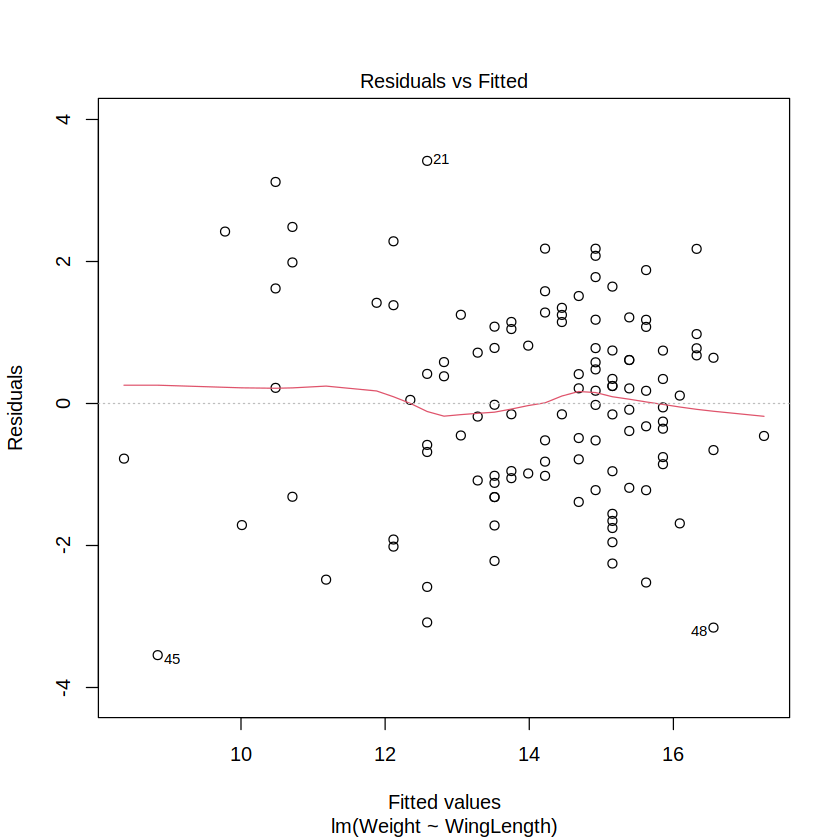

In [2]:
# First we load the data set
dfSparrows = read.csv("Sparrows.csv")

# 4) CODE HERE
# Now we fit a regression model
# dfSparrows
sparrow_model = lm(Weight~WingLength, data= dfSparrows)


# Plot the residuals versus fitted values.
plot(sparrow_model,1)

No evidence of nonconstant variance. There is more data for larger fitted values, however the spread of the data looks alright.

- We are looking at random variation above and below 0.
- We are looking for no apparent patterns.
- The width of the "band" of points is relatively constant.

In [3]:
# 5) CODE HERE
source("leveneTest.r")
leveneTest(Weight~Treatment,data = dfSparrows)

Warning message in leveneTest.default(y = y, group = group, ...):
“group coerced to factor.”


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,2,1.74936,0.1785612
,113,NA,NA


Heterogeneous variances are indicated by a non-random pattern in the residuals vs. fitted plot. With this categorical data, we are looking for even spread along the columns of dots. We appear to have that here, so what we see indicates homogeneity.

**Part B:** Now check the normality of the data with a Q-Q plot.

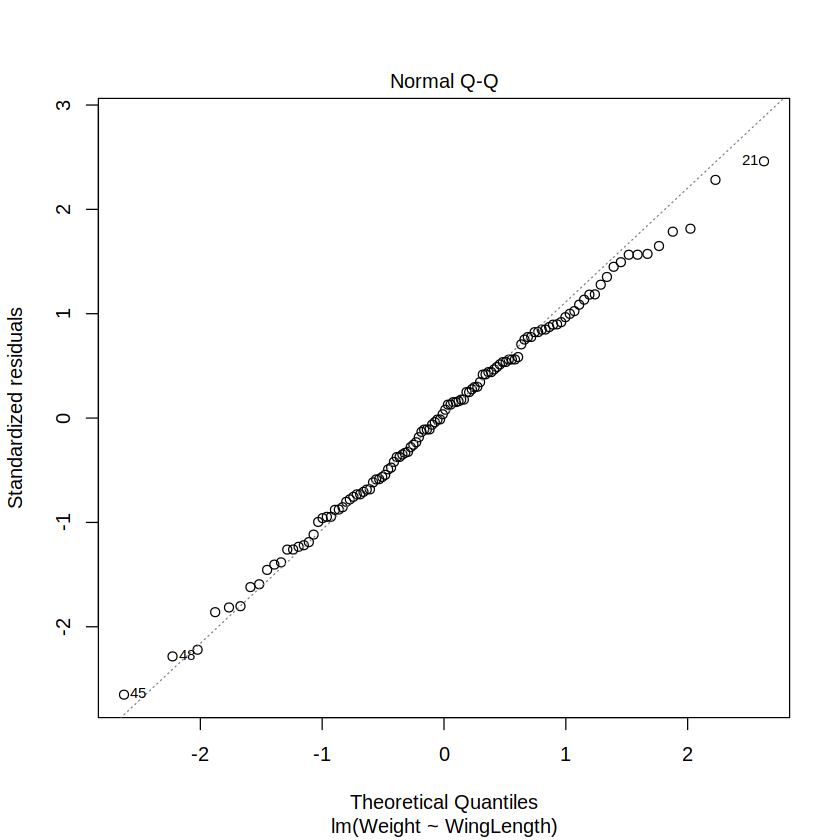

In [4]:
# 6) CODE HERE
plot(sparrow_model,2)

This data looks reasonably normal. 

**Part C:** Use the Shapiro-Wilk test to test for normality.

In [5]:
# Another test for normality of the residuals is the Shapiro-Wilk test.

# 7) CODE HERE
# Extract the residuals
sparrow_residuals = residuals(object = sparrow_model)
# Run the Shapiro-Wilk test
shapiro.test(x=sparrow_residuals)


	Shapiro-Wilk normality test

data:  sparrow_residuals
W = 0.99556, p-value = 0.9753


With this non-significant p-value, we would conclude that our data upholds the normality condition.

**Exercise 5)** How do you correct the problem of nonconstant variance.

- Use transformations. Recall sqrt(), log(), inverse()
- Use weighted least squares (not covered). See link below.

Further study for weighted least squares: https://stats.oarc.ucla.edu/stata/ado/analysis/stata-analysis-toolsweighted-least-squares-regression/

**Exercise 6)** How do you diagnose violations of the uncorrelated errors assumption?

+ successive residual plot

+ durbin-watson 

**Exercise 7)** Define outliers and influential observations. How do you find these points?

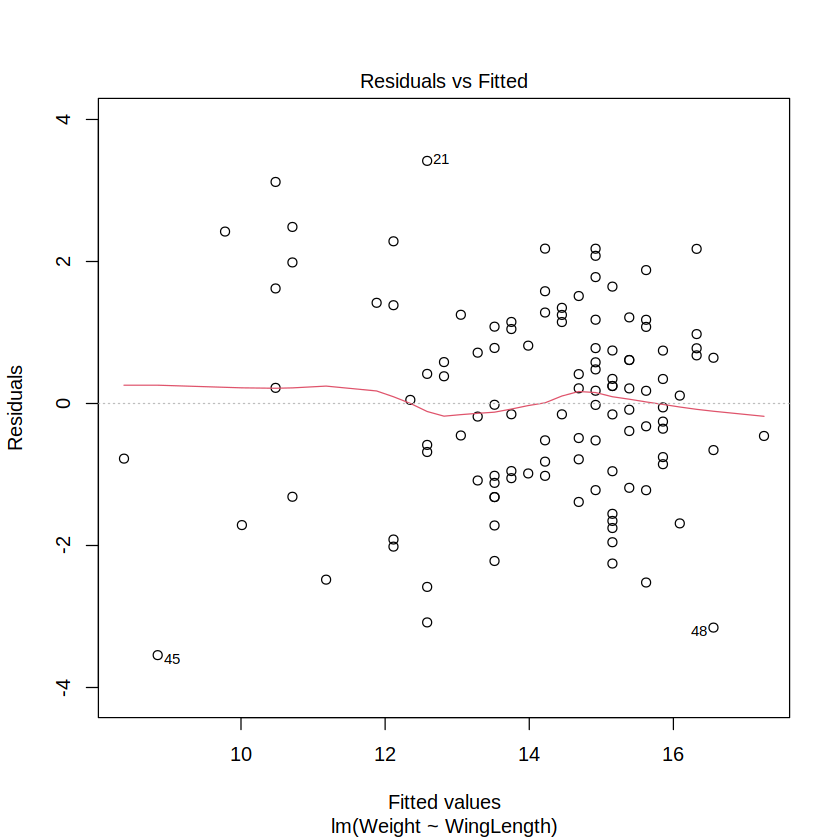

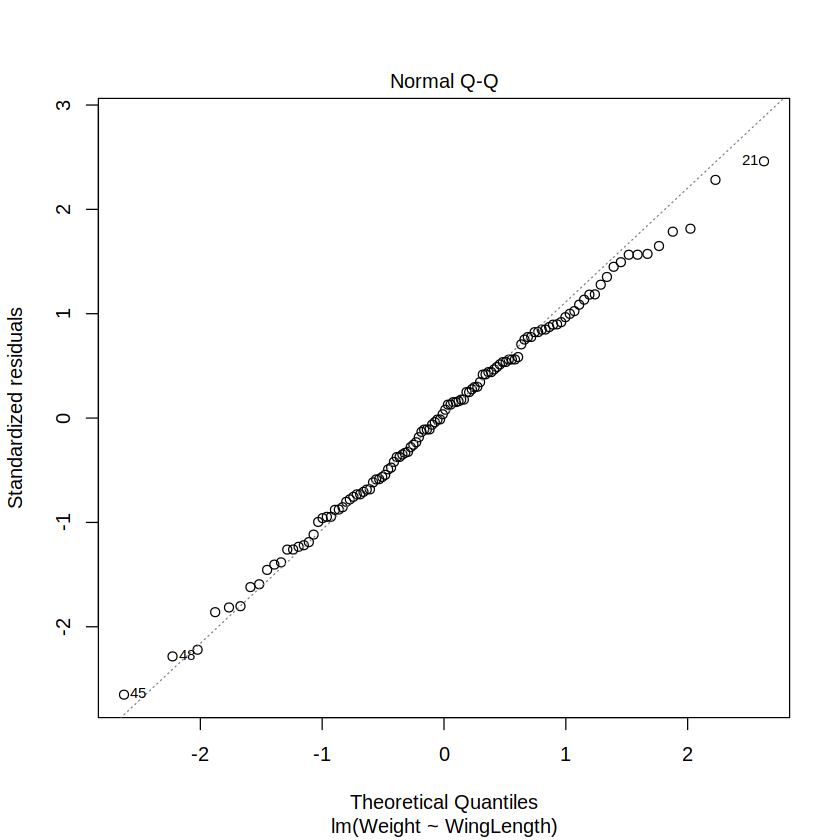

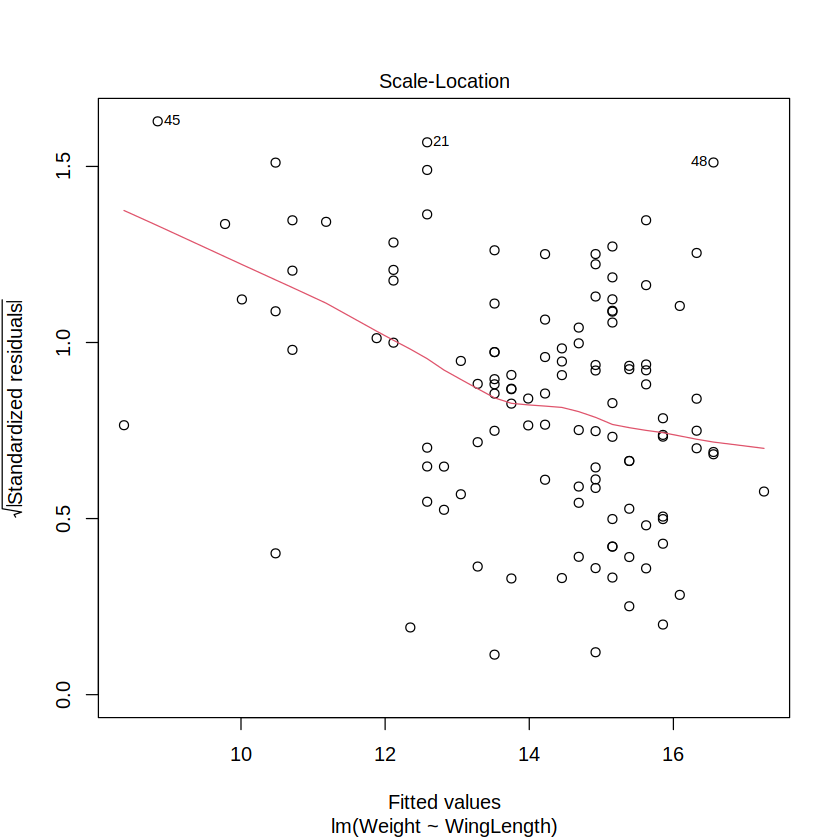

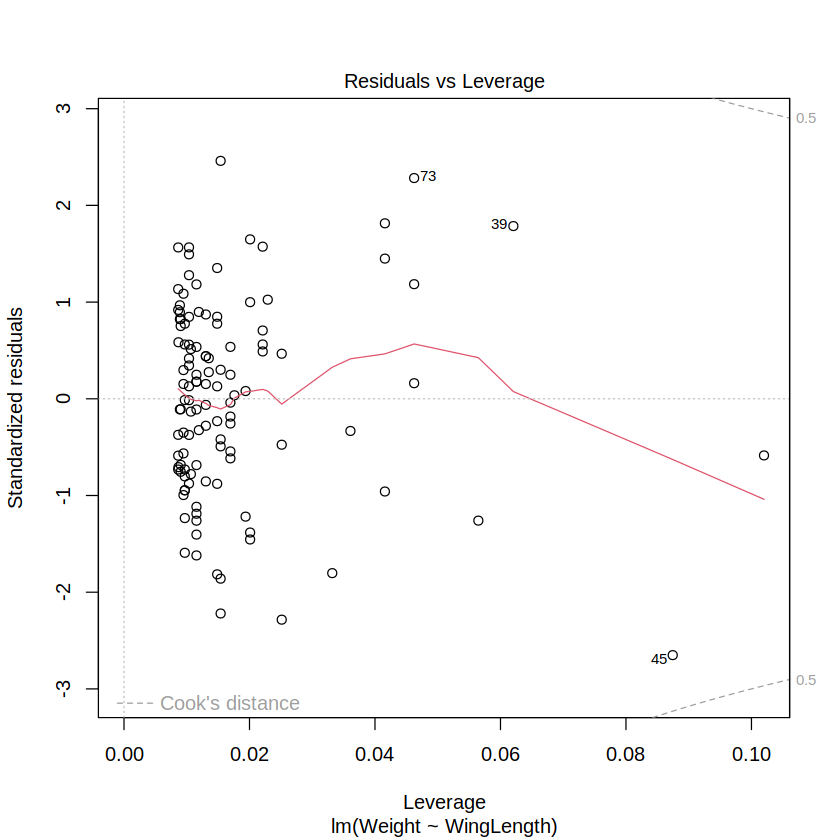

In [7]:
plot(sparrow_model)

Cook's distance - 
+ 0.5 - highly influential point
+ 1.0 - extermely influential point 

An **outlier** is a point with a large residual. 

An **influential point** is a point that has a large effect on the regression coefficients.

Not all outliers are influential.